**Programmer:** python_scripts (Abhijith Warrier)

**PYTHON SCRIPT TO _UNDERSTAND TRUE FEATURE IMPORTANCE USING PERMUTATION TECHNIQUE_. 🧠📊🔄**

This script demonstrates how to measure **feature importance** by observing how a trained model’s performance drops when individual features are randomly shuffled — a more reliable method than model-internal importance scores.

---

## **📦 Import Required Libraries**

We’ll use scikit-learn utilities for dataset loading, model training, and permutation importance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

---

## **🧩 Load the Dataset**

We’ll use a standard tabular classification dataset suitable for feature importance analysis.

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

---

## **✂️ Split Data into Train and Test Sets**

We keep a separate test set so importance is measured on unseen data.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

---

## **🤖 Train a Machine Learning Model**

A tree-based model is a good choice for demonstrating permutation importance.

In [4]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


---

## **🔁 Compute Permutation Feature Importance**

Each feature is shuffled multiple times to measure how much the model’s score drops.

In [5]:
perm_result = permutation_importance(
    model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

---

## **📊 Prepare Feature Importance Results**

We store the mean importance values in a DataFrame for easier analysis.

In [6]:
importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": perm_result.importances_mean
}).sort_values(by="importance", ascending=False)

---

## **📈 Visualise Top Important Features**

We plot the top 10 features that most affect model performance.

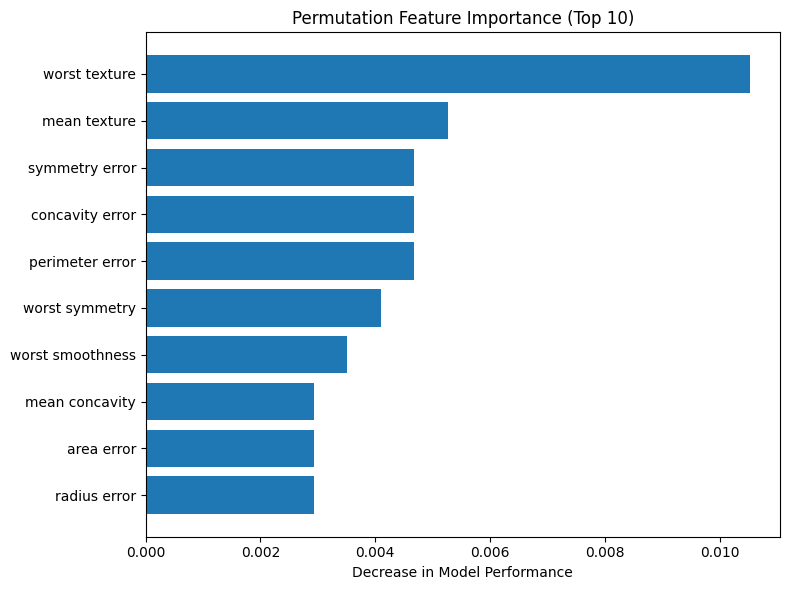

In [7]:
plt.figure(figsize=(8, 6))
plt.barh(
    importance_df["feature"].head(10)[::-1],
    importance_df["importance"].head(10)[::-1]
)
plt.xlabel("Decrease in Model Performance")
plt.title("Permutation Feature Importance (Top 10)")
plt.tight_layout()
plt.show()

---

## **🖨️ Print Feature Importance Values**

In [8]:
print("Top Permutation Feature Importances:")
print(importance_df.head(10))

Top Permutation Feature Importances:
             feature  importance
21     worst texture    0.010526
1       mean texture    0.005263
18    symmetry error    0.004678
16   concavity error    0.004678
12   perimeter error    0.004678
28    worst symmetry    0.004094
24  worst smoothness    0.003509
6     mean concavity    0.002924
13        area error    0.002924
10      radius error    0.002924


---

## **🧠 Key Takeaways**

1. Permutation importance measures **real impact on model performance**.
2. It works with **any model**, not just tree-based ones.
3. It avoids bias present in built-in feature importance scores.
4. Features causing larger score drops are more important.
5. Ideal for validating and debugging model behaviour.

---

## **Conclusion**

Permutation Feature Importance provides a **model-agnostic and trustworthy** way to understand which features truly matter. By evaluating importance on unseen data, it helps build more reliable and interpretable machine learning systems.

This technique is a critical addition to the **AI with Python – Advanced Visualisation & Interpretability** series.

---